Brady Gho

Created on July 10, 2024. Last editted July 10, 2024

Implementation of a single neuron neural net using numpy and math :D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!ls 'content/drive/MyDrive/Cosmos_Resources/Day_2/Data'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
ls: cannot access 'content/drive/MyDrive/Cosmos_Resources/Day_2/Data': No such file or directory


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#load the .npy file with our data inside
datapath = "/content/drive/MyDrive/Cosmos_Resources/Day_2/Data/placedata.npy"
data = np.load(datapath, allow_pickle=True).item()
print(data.keys())

#extract the data from files LRtrain, LRtest, LRtraintgt, LRtesttgt

train_data = data['LRtrain'].T         # timestamps x Neurons
traintgt_data = data['LRtraintgt']   # Place datas
test_data = data['LRtest'].T        # timestamps x Neurons
testtgt_data = data['LRtesttgt']     # Place datas

print(train_data.shape)
print(traintgt_data.shape)
print(test_data.shape)
print(testtgt_data.shape)

dict_keys(['LRtrain', 'RLtest', 'LRtest', 'LRtraintgt', 'RLtestgt', 'LRtesttgt'])
(916, 359)
(916,)
(904, 359)
(904,)


In [ ]:
# min-max normalization

def min_max_norm(data):
  low = min(data)
  high = max(data)

  for i in range(len(data)):
    data[i] = (data[i]-low)/(high-low)
  return data

testarr = [1,2,3,4,5,6,7,8,9,10,11]
print(min_max_norm(testarr))

# currently not sure what's going on with this
# np.apply_along_axis(min_max_norm, 1, x)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [ ]:
x_train = train_data
y_train = traintgt_data
x_test = test_data
y_test = testtgt_data

scaler = 1/30
w = np.random.randn(train_data.shape[1])*scaler
b = np.random.randn(1)*scaler

#comment: we divide by scalar b/c randn generates random numbers with a normal distribution that has std=1. We want to scale that down b/c starting values should be close to 0 for optimal results

train_initial_error = y_train - (np.dot(x_train, w) + b)
test_initial_error = y_test - (np.dot(x_test, w) + b)

train_loss_history = []
test_loss_history = []

def gradient_descent(x, y, w, b, lr=0.01):
  y_pred = np.dot(x, w) + b
  error = y - y_pred
  N = y.shape[0]

  w_descent = -np.dot(error, x)/N
  b_descent = -sum(error)/N

  w -= w_descent * lr
  b -= b_descent * lr

  return w, b

def MSE(x, y, w, b):
  y_pred = np.dot(x, w) + b
  error = y - y_pred
  N = y.shape[0]
  loss = sum(np.square(error))/N

  return loss

epochs = 500
for i in range(epochs):
  w, b = gradient_descent(x_train, y_train, w, b)
  train_loss = MSE(x_train, y_train, w, b)
  test_loss = MSE(x_test, y_test, w, b)

  train_loss_history.append(train_loss)
  test_loss_history.append(test_loss)

  if (i % (min(epochs/10, 100)) == 0):
    print(f"Loss on training dataset during the {i}th epoch: {train_loss}")
    print(f"Loss on test dataset: {test_loss} \n" )

Loss on training dataset during the 0th epoch: 0.25677682503695054
Loss on test dataset: 0.2800743758632453 

Loss on training dataset during the 50th epoch: 0.03234415629563412
Loss on test dataset: 0.06534997038957825 

Loss on training dataset during the 100th epoch: 0.012681740713365329
Loss on test dataset: 0.04311705816808961 

Loss on training dataset during the 150th epoch: 0.008333165304460807
Loss on test dataset: 0.03795785135019607 

Loss on training dataset during the 200th epoch: 0.0066259911950679005
Loss on test dataset: 0.036694582768114846 

Loss on training dataset during the 250th epoch: 0.005628169432785914
Loss on test dataset: 0.03661889497250186 

Loss on training dataset during the 300th epoch: 0.004940886465509504
Loss on test dataset: 0.036959732158745394 

Loss on training dataset during the 350th epoch: 0.004432174991279353
Loss on test dataset: 0.03744051699500671 

Loss on training dataset during the 400th epoch: 0.004038084342611632
Loss on test dataset:

Text(0.5, 1.0, 'Training and Test Loss Over Epochs')

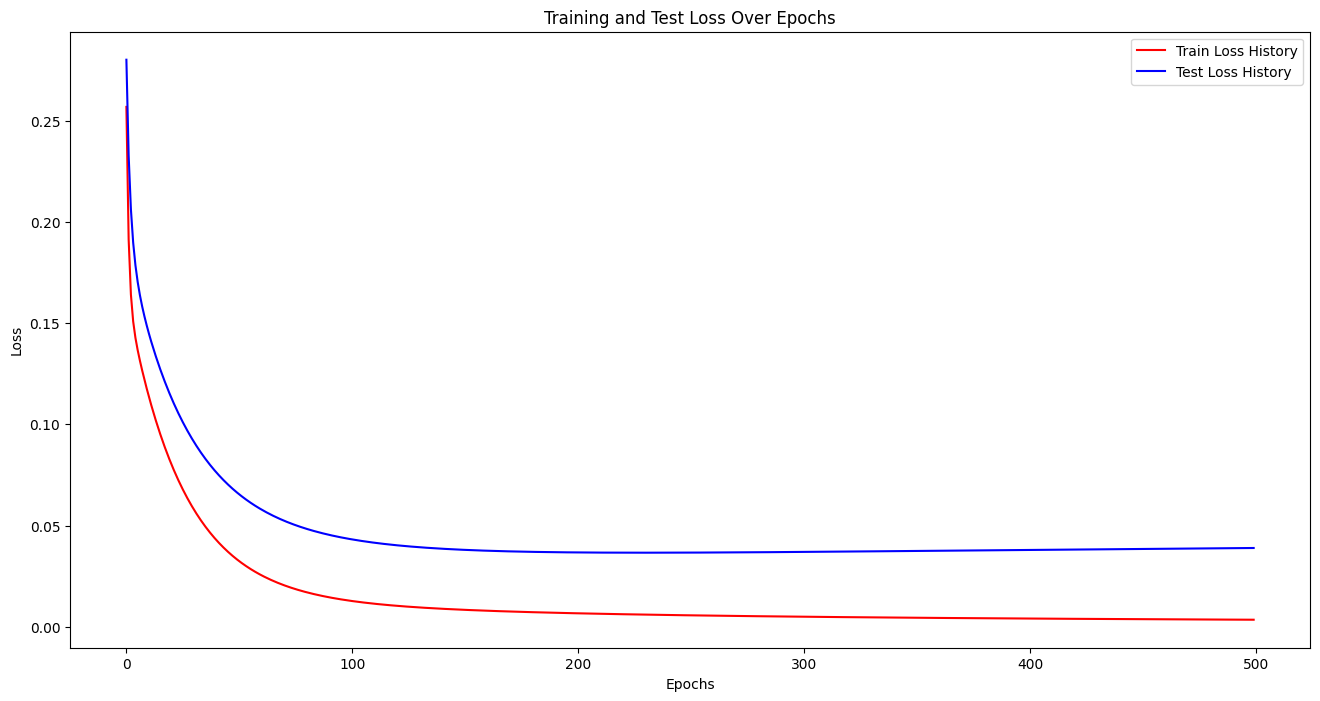

In [ ]:
# Loss Curve

plt.figure(figsize=(16, 8))
plt.plot(train_loss_history, 'r', label="Train Loss History")
plt.plot(test_loss_history, 'b', label="Test Loss History")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Test Loss Over Epochs")

Text(0.5, 1.0, 'Histogram of Test Errors')

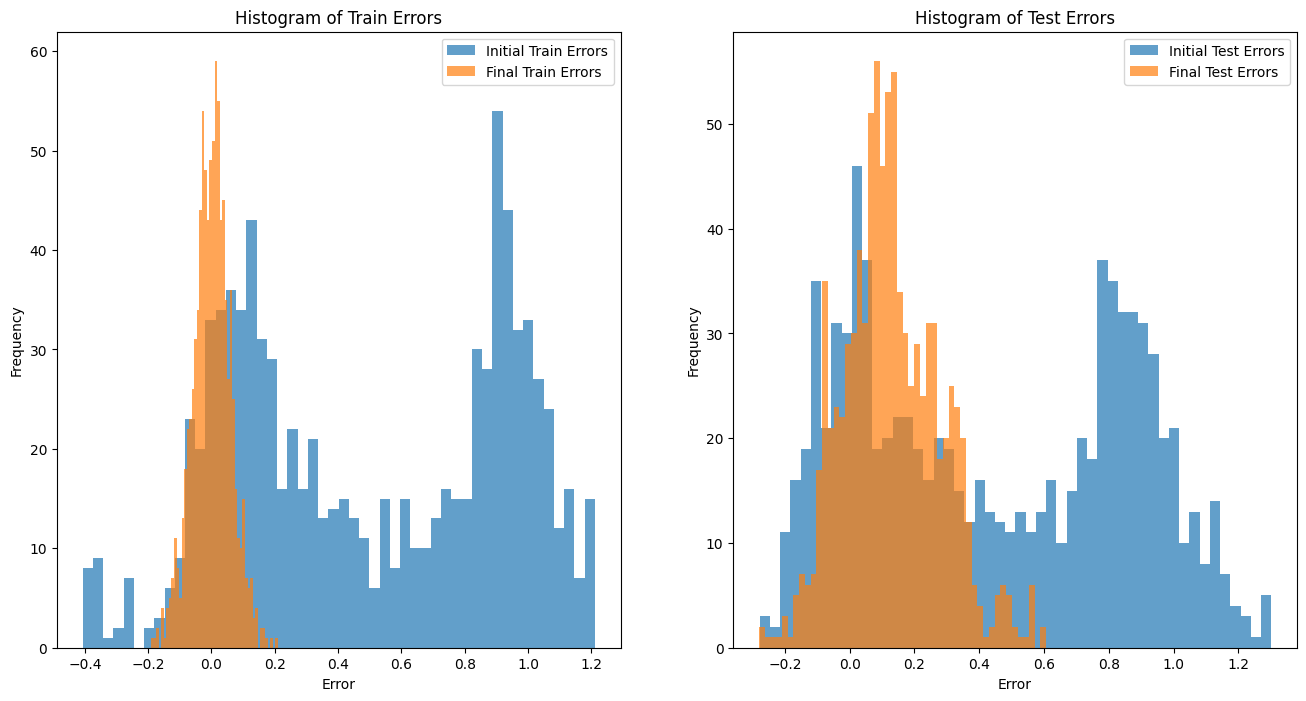

In [ ]:
# Histograms

train_final_error = y_train - (np.dot(x_train, w) + b)
test_final_error = y_test - (np.dot(x_test, w) + b)

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.hist(train_initial_error, bins=50, alpha=0.7, label='Initial Train Errors')
plt.hist(train_final_error, bins=50, alpha=0.7, label='Final Train Errors')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Train Errors')

plt.subplot(1, 2, 2)
plt.hist(test_initial_error, bins=50, alpha=0.7, label="Initial Test Errors")
plt.hist(test_final_error, bins=50, alpha=0.7, label="Final Test Errors")
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.legend()
plt.title('Histogram of Test Errors')

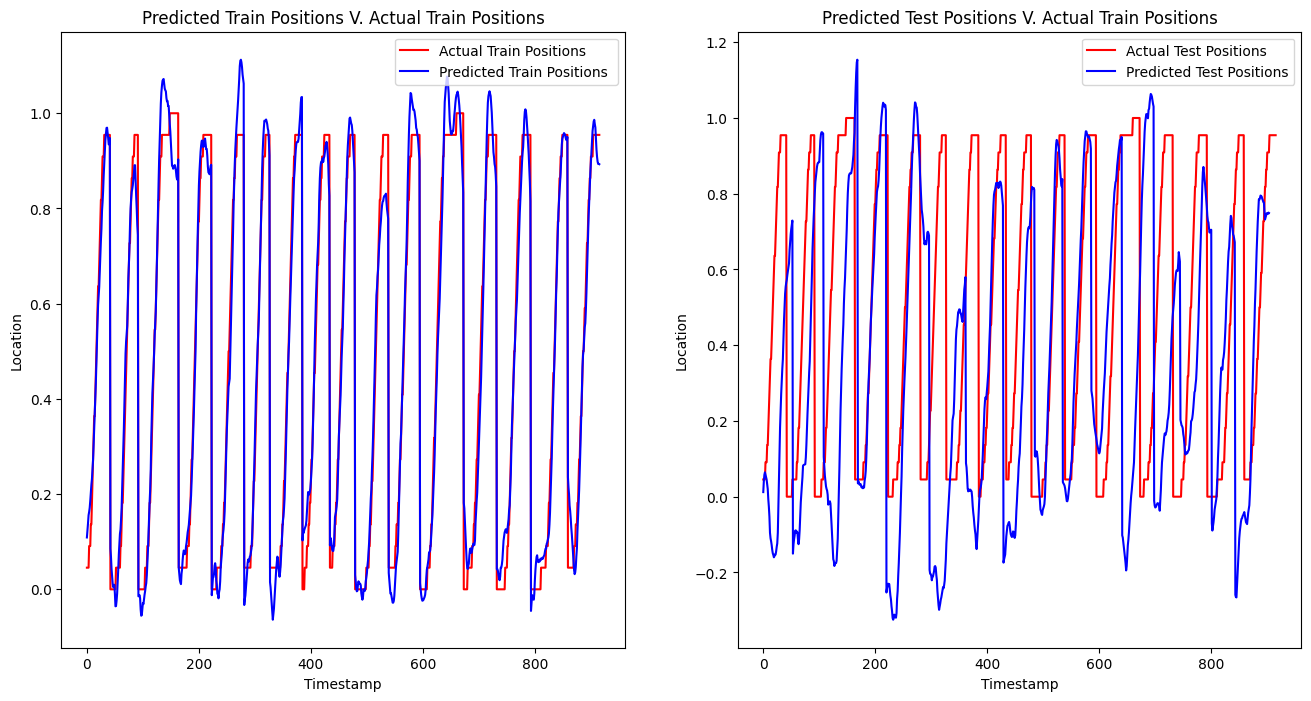

In [ ]:
# Final Predicted Position V Actual Position

final_predicted_positions_train = np.dot(x_train, w) + b
actual_positions_train = y_train

final_predicted_positions_test = np.dot(x_test, w) + b
actual_positions_test = y_test

plt.figure(figsize=(16, 8))
plt.subplot(1,2,1)
plt.plot(actual_positions_train, 'r', label="Actual Train Positions")
plt.plot(final_predicted_positions_train, 'b', label="Predicted Train Positions ")
plt.xlabel("Timestamp")
plt.ylabel("Location")
plt.title("Predicted Train Positions V. Actual Train Positions")
plt.legend()

plt.subplot(1,2,2)
plt.plot(actual_positions_train, 'r', label="Actual Test Positions")
plt.plot(final_predicted_positions_test, 'b', label="Predicted Test Positions")
plt.xlabel("Timestamp")
plt.ylabel("Location")
plt.title("Predicted Test Positions V. Actual Train Positions")
plt.legend()
